## Maaz Saeed | 2021268

### Task 1

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, factorial, cos, sin
import pprint # pretty printing

In [18]:
def nth_deriv(f, var,n):
    return diff(f, var, n)
# return the nth derivative of the symbolic function passes in as f

In [19]:
x = symbols('x')
g_x = lambda pt: np.cos(pt)
x0 = 0 # initial guess
iters = 100
tol = 10**-7

In [20]:
approxs = [x0] #approximations

for i in range(iters):
    x1 = g_x(approxs[-1]) # last point
    approxs.append(x1)

    if np.abs(x1 - approxs[-2]) < tol:
        break

root = approxs[-1]

print("ROOT: ", root)

ROOT:  0.7390851699445545


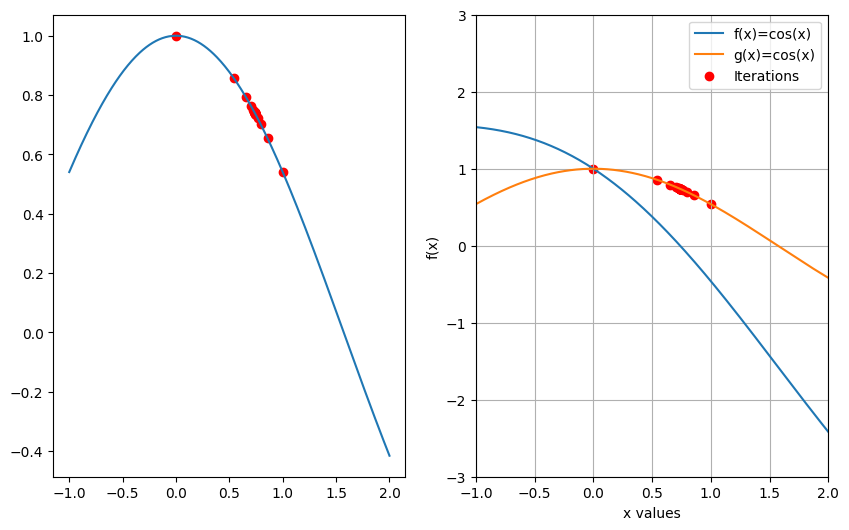

In [21]:
xs = np.linspace(-1, 2, 400)
ys = g_x(xs)

f_vals = ys - xs


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, ys, label='g(x)=cos(x)')
plt.scatter(approxs, g_x(np.array(approxs)), color='red', label='Iterations', marker='o')

plt.subplot(1, 2, 2)
plt.plot(xs, f_vals, label='f(x)=cos(x)')
plt.plot(xs, ys, label='g(x)=cos(x)')
plt.scatter(approxs, g_x(np.array(approxs)), color='red', label='Iterations', marker='o')

plt.xlabel("x values")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.ylim(-3, 3)  
plt.xlim(-1, 2)  
plt.show()




### Task 2

In [22]:
f_x = np.e**x - 2
x0 = 0.5 # initial-guess
f_prime_x = nth_deriv(f_x, x, 1) # f'(x)
tol = 10**-7

In [23]:
i = 1
n_iters = 100
guesses = [x0]

while i <= n_iters:
    x1 = x0 - (f_x.subs(x, x0) / f_prime_x.subs(x, x0))
    guesses.append(x1)
    if np.abs(x1 - x0) < tol:
        break
    i = i + 1
    x0 = x1

print("Root: ", x0)
print(guesses)
fx_guesses = np.array(list(map(lambda pt: f_x.subs(x, pt), guesses)))
print(fx_guesses)




Root:  0.693147199958593
[0.5, 0.713061319425267, 0.693344157315504, 0.693147199958593, 0.693147180559945]
[-0.351278729299872 0.0402274962850475 0.000393992313507674
 3.87972951543247e-8 0]


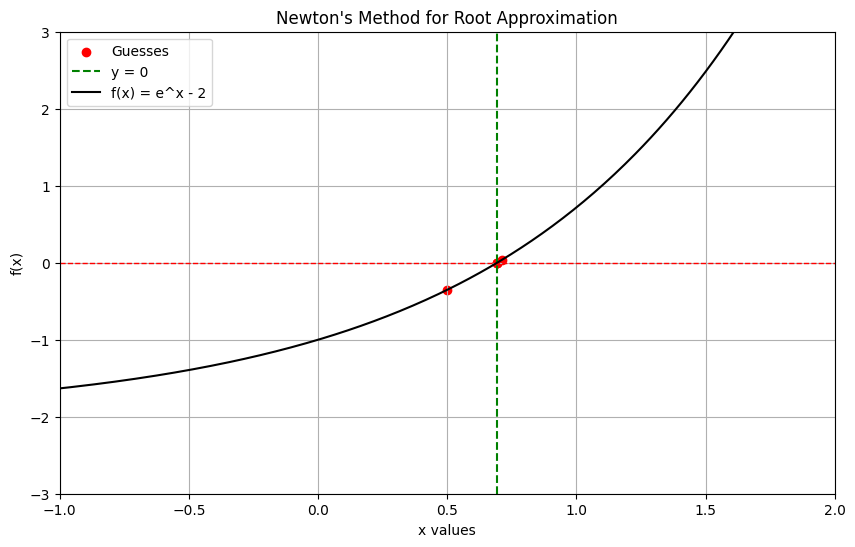

In [24]:
x_vals = np.linspace(-2, 2, 400)
f_vals = np.e**x_vals - 2

plt.figure(figsize=(10, 6))
plt.scatter(guesses, fx_guesses, color='red', label='Guesses', marker='o')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  
plt.axvline(x1, color='green', linestyle='--', label='y = 0') 
plt.plot(x_vals, f_vals, color='black', label='f(x) = e^x - 2') 

plt.title("Newton's Method for Root Approximation")
plt.xlabel("x values")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.ylim(-3, 3)  
plt.xlim(-1, 2)  
plt.show()